In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.ConvNet.ConvNet import *
from NN_library.ConvNet.train_ConvNet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda


In [2]:
data = dataset_seq()
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(1000)
loaders = get_loaders(data, 16)

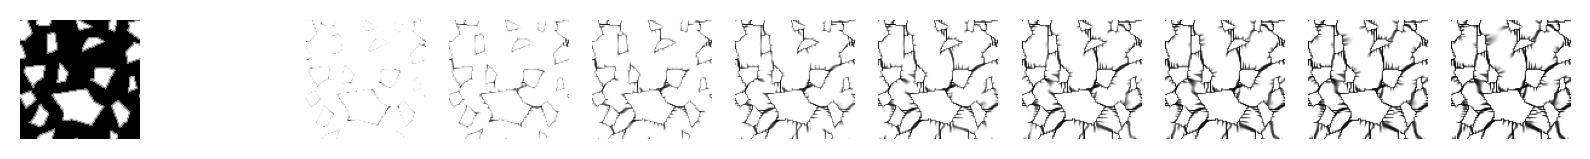

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys')
    axs.flat[i].set_axis_off()

In [26]:
name = 'NN_library/ConvNet/ConvNet_norm'
args = {'lr' : 0.000001, 'epochs' : 20, 'dev' : dev, 'name' : name}

In [10]:
net = ConvNet(16)

In [11]:
torch.cuda.empty_cache() 

In [7]:
total_params = sum(p.numel() for p in net.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 411042


In [25]:
net = load_network(net, args['name']+'_99', args)

In [27]:
losses_train, losses_val = train(net, loaders, args)

Epoch: 0 batch: 0 mean train loss:  0.1856275843
Epoch: 0 batch: 100 mean train loss:  0.2172937063
Epoch: 0 batch: 200 mean train loss:  0.1939635812
Epoch: 0 batch: 300 mean train loss:  0.1847247039
Epoch: 0 batch: 400 mean train loss:  0.2528281910
Epoch: 0 batch: 500 mean train loss:  0.2504504612
Epoch: 0 batch: 600 mean train loss:  0.2054213448
Epoch: 0 batch: 700 mean train loss:  0.2524086735
Epoch: 0 mean train loss:  0.2181927846 mean val. rec. loss:  0.2274075300
Epoch: 1 batch: 0 mean train loss:  0.1713455957
Epoch: 1 batch: 100 mean train loss:  0.2351264725
Epoch: 1 batch: 200 mean train loss:  0.2360958545
Epoch: 1 batch: 300 mean train loss:  0.2509757783
Epoch: 1 batch: 400 mean train loss:  0.1967196530
Epoch: 1 batch: 500 mean train loss:  0.1826805663
Epoch: 1 batch: 600 mean train loss:  0.2335766004
Epoch: 1 batch: 700 mean train loss:  0.1924761096
Epoch: 1 mean train loss:  0.2187686392 mean val. rec. loss:  0.2259967178
Epoch: 2 batch: 0 mean train loss:  0.

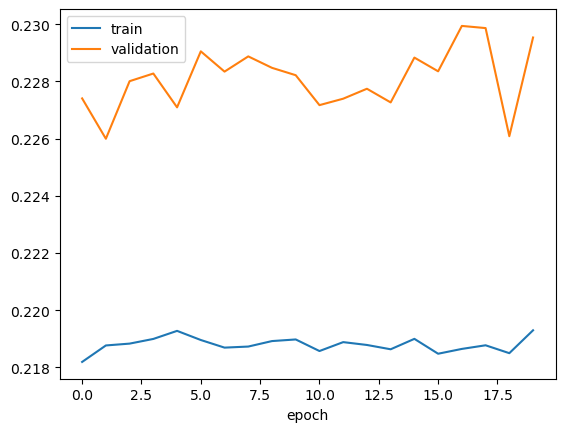

In [28]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])